### Food Image Classification (CNN)


🧠 **Overview:** This project builds a CNN that classifies food images into categories like pizza, burger, pasta, etc.

🎯 **Objective:**  Recognize different food types from images for diet or restaurant automation systems.

🧰 **Tools / Libraries:** Python, TensorFlow/Keras, NumPy, Scikit-learn, Matplotlib.

🧾 **Dataset:** Food-101 dataset (Kaggle) or a smaller custom dataset (Pizza, Burger, Fries).

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('/content/Foodpanda Analysis Dataset.csv', encoding='latin 1')
df = pd.DataFrame(data)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam


from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/food_dataset'

import os

# List the directories in the data_path
directories = os.listdir(data_path)

print("Folders in the dataset directory:")
for directory in directories:
    print(directory)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folders in the dataset directory:
apple_pie
pizza


In [ ]:
import os
import cv2 # Import OpenCV
import numpy as np

# Assume the directories are named 'apple_pie' and 'pizza'
# You might need to adjust this based on your actual folder names

label_mapping = {'apple_pie': 0, 'pizza': 1}

images = []
labels = []

# Define the target size for resizing
IMG_WIDTH = 128
IMG_HEIGHT = 128

for directory in directories:
    label = label_mapping[directory]
    folder_path = os.path.join(data_path, directory)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        # Resize the image
        if img is not None:
          img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) # Example resize
          images.append(img)
          labels.append(label)
        else:
          print(f"Warning: Could not read image {img_path}")


print(f"Loaded {len(images)} images with {len(labels)} labels.")

Loaded 2000 images with 2000 labels.


In [ ]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np


# Split data: Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert lists to NumPy arrays after splitting
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


num_classes = 2

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

**Data augmentation (optional but recommended): **

Apply techniques like rotation, zooming, and flipping to the training data to increase the dataset size and improve model generalization.

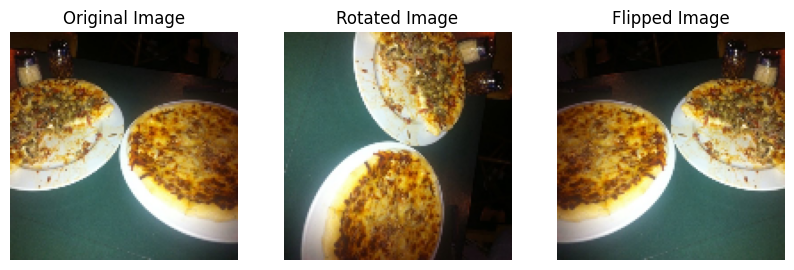

In [ ]:
# take one pizza image and do rotation,flipping,zooming

import cv2
import matplotlib.pyplot as plt

sample_img_piza = cv2.imread('/content/drive/MyDrive/food_dataset/pizza/1008844.jpg')
sample_img_piza = cv2.resize(sample_img_piza, (128,128))
sample_img_piza_rotated = cv2.rotate(sample_img_piza, cv2.ROTATE_90_CLOCKWISE)
sample_img_piza_flipped = cv2.flip(sample_img_piza, 1)
# OpenCV does not have a built-in zoom function like this.
# You would typically use cv2.resize to achieve a zoom effect.
# For now, I will skip the zoom part or implement it using resize if needed.
# sample_img_piza_zoomed = cv2.resize(sample_img_piza, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)


# visualization of these action

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sample_img_piza, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(sample_img_piza_rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sample_img_piza_flipped, cv2.COLOR_BGR2RGB))
plt.title('Flipped Image')
plt.axis('off')

plt.show()

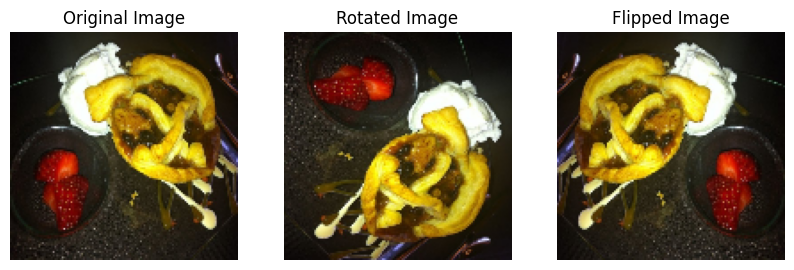

In [ ]:


# take one pizza image and do rotation,flipping,zooming

import cv2
import matplotlib.pyplot as plt

sample_img_piza = cv2.imread('/content/drive/MyDrive/food_dataset/apple_pie/1026328.jpg')
sample_img_piza = cv2.resize(sample_img_piza, (128,128))
sample_img_piza_rotated = cv2.rotate(sample_img_piza, cv2.ROTATE_90_CLOCKWISE)
sample_img_piza_flipped = cv2.flip(sample_img_piza, 1)
# OpenCV does not have a built-in zoom function like this.
# You would typically use cv2.resize to achieve a zoom effect.
# For now, I will skip the zoom part or implement it using resize if needed.
# sample_img_piza_zoomed = cv2.resize(sample_img_piza, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)


# visualization of these action

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sample_img_piza, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(sample_img_piza_rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sample_img_piza_flipped, cv2.COLOR_BGR2RGB))
plt.title('Flipped Image')
plt.axis('off')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


# ---------------------------------------------------------------------

# ⚙️ Step 3: Compile Model
# ---------------------------------------------------------------------
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# ---------------------------------------------------------------------
# 🧑‍🏫 Step 4: Add Callbacks
# ---------------------------------------------------------------------
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
save_best = keras.callbacks.ModelCheckpoint('best_student_model.keras', save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)

# Convert lists to NumPy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# One-hot encode the target labels
y_train_one_hot = to_categorical(y_train_np, num_classes=num_classes)


# ⚙️ Step 5: Train Model (Combined Training and Callbacks)
# ---------------------------------------------------------------------
history = model.fit(X_train_np, y_train_one_hot,epochs= 20,validation_split=0.2,callbacks=[early_stop, save_best, tensorboard_cb],verbose=0)

# ---------------------------------------------------------------------
# 🧪 Step 6: Evaluate Model
# ---------------------------------------------------------------------
loss, acc = model.evaluate(X_train_np, y_train_one_hot)
print(f"✅ Final Accuracy on Student Dataset: {acc:.2f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 272ms/step - accuracy: 0.8412 - loss: 0.3287
✅ Final Accuracy on Student Dataset: 0.79


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Class: Pizza
Confidence: 0.9221744537353516


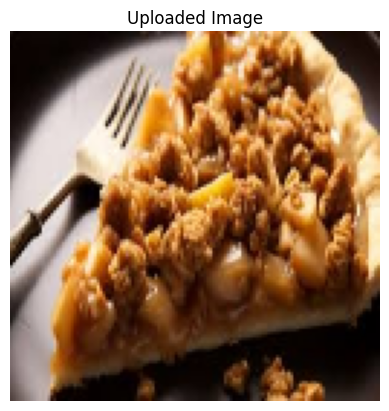

In [ ]:
#prediction of food based on image and get food is which categoriy
import cv2
import numpy as np


sample_image = cv2.imread('/content/images (1).jpeg')

# preciction of the data perform that what food is this

sample_image = cv2.resize(sample_image, (128,128))
sample_image = sample_image.reshape(1, 128, 128, 3)

prediction = model.predict(sample_image)

if prediction[0][0] > 0.5:
    print("Predicted Class: Pizza")
else:
    print("Predicted Class: Apple Pie")

# how to perform confidence

confidence = prediction[0][0]
print(f"Confidence: {confidence}")

# visualization of upload and analysis one

import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(sample_image[0], cv2.COLOR_BGR2RGB))
plt.title('Uploaded Image')
plt.axis('off')
plt.show()

